In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
class gridEnv:
    def __init__(self, height, width, agentType = "R"):
        self.dimensions = [height,width]
        self.goal_pos = [0,0]
        self.reward_goal_pos = 20
        self.start_pos = [height,0]
        self.agent_pos = [height,0]
        self.agent_path = []
        self.agent_returns = []
        self.agent_sample_traj = []
        self.agent_acc_reward = 0
        self.step_count = 0
        self.action_space = ["U", "D", "L", "R"]
        self.action_prob = [0.25,0.25,0.25,0.25]
        self.reward = -1
        #self.gamma = 1
        self.threshold = 0.01
        #self.obstacles = [[2,0],[2,1],[2,2],[2,3],[2,4],[2,5]]
        self.step_limit = 50
        self.agent = agentType
        self.greedy_agent_path = ["R","R","R","R","R","R","U","U","U","U","U","U","L","L","L","L","L","L"]
        
    def show_grid(self):
        gridworld = np.zeros(self.dimensions)
        gridworld[self.goal_pos[0],self.goal_pos[1]] = 100
        for i in range(len(self.obstacles)):
            ob_coords = self.obstacles[i]
            gridworld[ob_coords[0],ob_coords[1]] = -100
        if self.step_count == 0:
            gridworld[self.start_pos[0],self.start_pos[1]] = 1
        else:
            gridworld[self.agent_pos[0],self.agent_pos[1]] = 1        
        #print("The agent position is: {}".format(self.agent_pos))
        #print("The agent accumualted reward is:{}".format(self.agent_acc_reward))
        #print("This is the agent path: {}".format(self.agent_path))
        #print(gridworld)

    def chooseAction(self):
        #returns a random action
        if self.agent == "G":
            action = self.greedy_agent_path[(self.step_count-1)]
        else:
            action = np.random.choice(self.action_space)
        return action
    
    def seqManager(self):
        #print("Initial State:")
        self.show_grid()
        while self.step_count < self.step_limit:
            self.step_count += 1
            #print("Time step: {}".format(self.step_count))
            self.action()
        else:
            #print("Step count reached!")
            self.agent_sample_traj = self.agent_path
            self.agent_returns.append(self.agent_acc_reward)
            self.terminate()
            
    def action(self):
        a = self.chooseAction()
        if a == "U" and self.agent_pos[0] > 0:
            self.agent_pos[0] -= 1
            if self.agent_pos[1] == 0 and self.agent_pos[0] == 0:
                self.agent_acc_reward += 20
                self.agent_path.append(a)
                self.show_grid()
                self.step_count = 50 #to terminate if goal is reached
            else:
                #if self.agent_pos[0] == 2 and self.agent_pos[1] != self.dimensions[1]-1:
                    #print("Obstacle ahead")
                  #  self.agent_pos[0] += 1
                   # self.show_grid()
           # else:
                self.agent_acc_reward -= 1
                self.agent_path.append(a)
                self.show_grid()
        elif a == "U" and self.agent_pos[0] == 0:
            #print("Cannot move off grid")
            pass
        elif a == "D" and self.agent_pos[0] < (self.dimensions[0]-1):
            self.agent_pos[0] += 1
            #if self.agent_pos[0] == 2 and self.agent_pos[1] != self.dimensions[1]-1:
                #print("Obstacle ahead")
               # self.agent_pos[0] -= 1
               # self.show_grid()
            #else:
            self.agent_acc_reward -=1
            self.agent_path.append(a)
            self.show_grid()
        elif a == "D" and self.agent_pos[0] == (self.dimensions[0]-1):
            #print("Cannot move off grid")
            pass
        elif a == "L" and self.agent_pos[1] > 0:
            self.agent_pos[1] -= 1
            if self.agent_pos[1] == 0 and self.agent_pos[0] == 0:
                self.agent_acc_reward += 20
                self.agent_path.append(a)
                self.show_grid()
                self.step_count = 50 #to terminate if goal is reached
            else:
               # if self.agent_pos[0] == 2 and self.agent_pos[1] == self.dimensions[1]-2:
                    #print("Obstacle ahead")
                   # self.agent_pos[1] += 1
                   # self.show_grid()
               # else:
                self.agent_acc_reward -= 1
                self.agent_path.append(a)
                self.show_grid()
        elif a == "L" and self.agent_pos[1] == 0:
            #print("Cannot move off grid")
            pass
        elif a == "R" and self.agent_pos[1] < (self.dimensions[1]-1):
            self.agent_pos[1] += 1
            self.agent_acc_reward -= 1
            self.agent_path.append(a)
            self.show_grid()
        elif a == "R" and self.agent_pos[1] == (self.dimensions[1]-1):
            #print("Cannot move off grid")
            pass

                
    def terminate(self):
        self.step_count = 0
        self.agent_pos[0] = self.start_pos[0]
        self.agent_pos[1] = self.start_pos[1]
        self.agent_path = [] 
        self.agent_acc_reward = 0
        self.step_count = 0        
        

In [26]:
grid4x4 = gridEnv(4,4)

In [29]:
def twoArray(grid, gamma = 1):
    
    value_fn = np.zeros(grid.dimensions)
    old_value_fn = np.zeros(grid.dimensions)

    count = 0
    delta = 1
    
    while delta > 0.01:
        count +=1
        #print("Count: {}".format(count))
        old_value_fn = value_fn
        value_fn = np.zeros(grid.dimensions)
        delta = 0
        for row in range(value_fn.shape[0]):
            for col in range(value_fn.shape[1]):
                action_count = 4
                if row == grid.goal_pos[0] and col == grid.goal_pos[1]: # dont compute the goal
                    pass
                else:
                    
                    #Check how many actions u can take to determine probability
                    if (row == 0) or (row == (grid.dimensions[0]-1)):
                        if (col == 0) or (col == (grid.dimensions[1]-1)):
                            action_count = 2
                            #print("AT THE CORNER AT THE CORNER")
                            action_count = 2
                        else:
                            action_count = 3
                    if (col == 0 or col == (grid.dimensions[1]-1)) and ((row!= 0) and (row != grid.dimensions[0]-1)):
                        action_count = 3
                        
                    #print("State: row {} col {}".format(row,col))    
                    #print("action count:{}".format(action_count))    
                    probability = 1/action_count
                    #print("Prob: {}".format(probability))
                    
                    
                    #Up action
                    if row > 0:
                        bellman_update_u = probability*(grid.reward +gamma*old_value_fn[row-1,col])
                    else:
                        bellman_update_u = 0
                    #Down action
                    if row < (grid.dimensions[0]-1):
                        bellman_update_d = probability*(grid.reward +gamma*old_value_fn[row+1,col])
                    else:
                        bellman_update_d = 0
                    #Left action
                    if col > 0:
                        bellman_update_l = probability*(grid.reward +gamma*old_value_fn[row,col-1])
                    else:
                        bellman_update_l = 0
                    #Right action
                    if col < (grid.dimensions[1]-1):
                        bellman_update_r = probability*(grid.reward +gamma*old_value_fn[row,col+1])
                    else:
                        bellman_update_r = 0
                    #update value fn
                    value_fn[row,col] =  bellman_update_u + bellman_update_d + bellman_update_l + bellman_update_r      
                    #value_fn[grid.goal_pos[0], grid.goal_pos[0]] = 0

                    #update delta
                    
                    #print("The old value: {}".format(old_value_fn[row,col]))
                    #print("The new value: {}".format(value_fn[row,col]))
                    #print("abs old - new: {}".format(abs(old_value_fn[row,col] - value_fn[row,col])))
                   # print("old delta: {}".format(delta))

                    changeVal = abs(value_fn[row,col] - old_value_fn[row,col])

                    if delta > changeVal:
                                    delta = delta
                    else:
                                    delta = changeVal
                    #delta = min(delta, abs(value_fn[row,col] - old_value_fn[row,col] ))
                    #print("New delta: {}".format(delta))
                    
                
    return value_fn, old_value_fn, count

In [30]:
two_arr_val_fn, old_two_arr_val_fn, count = twoArray(grid4x4)

2-Array iterations: 181


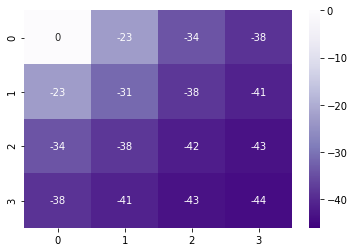

In [60]:
print("2-Array iterations: " + str(count))
sns.heatmap(two_arr_val_fn,vmin=-46,annot=True, cmap = "Purples_r");

In [32]:
def inPlace(grid, gamma = 1):
    
    value_fn = np.zeros(grid.dimensions)
    old_value_fn = np.zeros(grid.dimensions)

    count = 0
    delta = 1
    
    while delta > 0.01:
        count +=1
        #print("Count: {}".format(count))
        old_value_fn = value_fn
        #value_fn = np.zeros(grid.dimensions)
        delta = 0
        for row in range(value_fn.shape[0]):
            for col in range(value_fn.shape[1]):
                action_count = 4
                if row == grid.goal_pos[0] and col == grid.goal_pos[1]: # dont compute the goal
                    pass
                else:
                    
                    #Check how many actions u can take to determine probability
                    if (row == 0) or (row == (grid.dimensions[0]-1)):
                        if (col == 0) or (col == (grid.dimensions[1]-1)):
                            action_count = 2
                            #print("AT THE CORNER AT THE CORNER")
                            action_count = 2
                        else:
                            action_count = 3
                    if (col == 0 or col == (grid.dimensions[1]-1)) and ((row!= 0) and (row != grid.dimensions[0]-1)):
                        action_count = 3
                        
                    #print("State: row {} col {}".format(row,col))    
                    #print("action count:{}".format(action_count))    
                    probability = 1/action_count
                    #print("Prob: {}".format(probability))
                    
                    
                    #Up action
                    if row > 0:
                        bellman_update_u = probability*(grid.reward +gamma*value_fn[row-1,col])
                    else:
                        bellman_update_u = 0
                    #Down action
                    if row < (grid.dimensions[0]-1):
                        bellman_update_d = probability*(grid.reward +gamma*value_fn[row+1,col])
                    else:
                        bellman_update_d = 0
                    #Left action
                    if col > 0:
                        bellman_update_l = probability*(grid.reward +gamma*value_fn[row,col-1])
                    else:
                        bellman_update_l = 0
                    #Right action
                    if col < (grid.dimensions[1]-1):
                        bellman_update_r = probability*(grid.reward +gamma*value_fn[row,col+1])
                    else:
                        bellman_update_r = 0
                    #update value fn
                    value_fn[row,col] =  bellman_update_u + bellman_update_d + bellman_update_l + bellman_update_r      
                    #value_fn[grid.goal_pos[0], grid.goal_pos[0]] = 0

                    #update delta
                    
                    #print("The old value: {}".format(old_value_fn[row,col]))
                    #print("The new value: {}".format(value_fn[row,col]))
                    #print("abs old - new: {}".format(abs(old_value_fn[row,col] - value_fn[row,col])))
                   # print("old delta: {}".format(delta))

                    changeVal = abs(value_fn[row,col] - old_value_fn[row,col])

                    if delta > changeVal:
                                    delta = delta
                    else:
                                    delta = changeVal
                    #delta = min(delta, abs(value_fn[row,col] - old_value_fn[row,col] ))
                    #print("New delta: {}".format(delta))
                    
                
    return value_fn, count

In [33]:
in_place_val_fn, in_place_count = inPlace(grid4x4)

In place iterations: 1


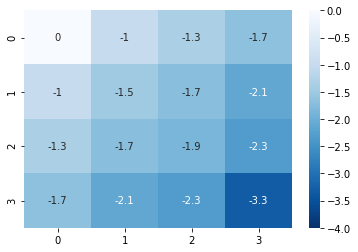

In [58]:
print("In place iterations: " + str(in_place_count))
sns.heatmap(in_place_val_fn,vmin=-4,annot=True, cmap = "Blues_r");

In [37]:
gamma_arr = np.logspace(-0.2,0,num =20)
gamma_arr

array([0.63095734, 0.64643716, 0.66229676, 0.67854546, 0.6951928 ,
       0.71224856, 0.72972276, 0.74762568, 0.76596782, 0.78475997,
       0.80401316, 0.82373871, 0.8439482 , 0.8646535 , 0.88586679,
       0.90760052, 0.92986747, 0.9526807 , 0.97605364, 1.        ])

In [39]:
two_arr_iterations = []
in_place_iterations = []
for val in gamma_arr:
    # 2 - array 
    two_arr_val_fn, old_two_arr_val_fn,two_arr_c = twoArray(grid4x4, gamma = val)
    two_arr_iterations.append(two_arr_c)
    #in place
    in_pla_val_fn, in_pla_c = inPlace(grid4x4, gamma = val)
    in_place_iterations.append(in_pla_c)
    
print("two_arr")
print(two_arr_iterations)
print('\nin_place')
print(in_place_iterations)

two_arr
[11, 12, 12, 13, 14, 15, 15, 17, 18, 19, 21, 23, 26, 29, 34, 40, 49, 65, 95, 181]

in_place
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


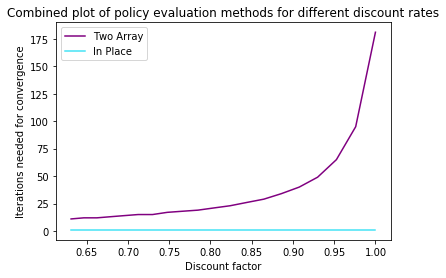

In [67]:
plt.plot(gamma_arr, two_arr_iterations, color = "purple" ,label="Two Array")
plt.plot(gamma_arr,in_place_iterations, color = "#42e3f5",label="In Place")
plt.title("Combined plot of policy evaluation methods for different discount rates")
plt.xlabel("Discount factor")
plt.ylabel("Iterations needed for convergence")
plt.legend()